# Tugas 1


1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.
2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?
    * meanfreq, IQR, sfm, dan sp.ent dipilih karena mampu membedakan suara male dan female dengan baik.
      - meanfreq paling berpengaruh karena frekuensi suara wanita umumnya lebih tinggi.
      - sfm dan sp.ent membantu memperjelas pola spektrum suara.
      - IQR menambah variasi untuk membedakan distribusi suara.
  
    * Dari grafik pairplot terlihat bahwa data male dan female membentuk cluster yang cukup terpisah, sehingga keempat fitur ini merupakan kombinasi fitur paling optimal untuk klasifikasi suar
3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.
  * Berdasarkan grafik “Nilai K vs Akurasi”, terlihat bahwa akurasi meningkat seiring bertambahnya nilai K dari 1 hingga mencapai puncak pada K = 8 dengan akurasi sekitar 0.937 (93.7%). Setelah K = 8, akurasi mulai sedikit menurun.


In [13]:
# Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('C:\\kuliah\\Machine Leaning\\2341720003_ML_2025\\data\\voice.csv')
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [14]:
data.info()
data.describe()
data['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

label
male      1584
female    1584
Name: count, dtype: int64

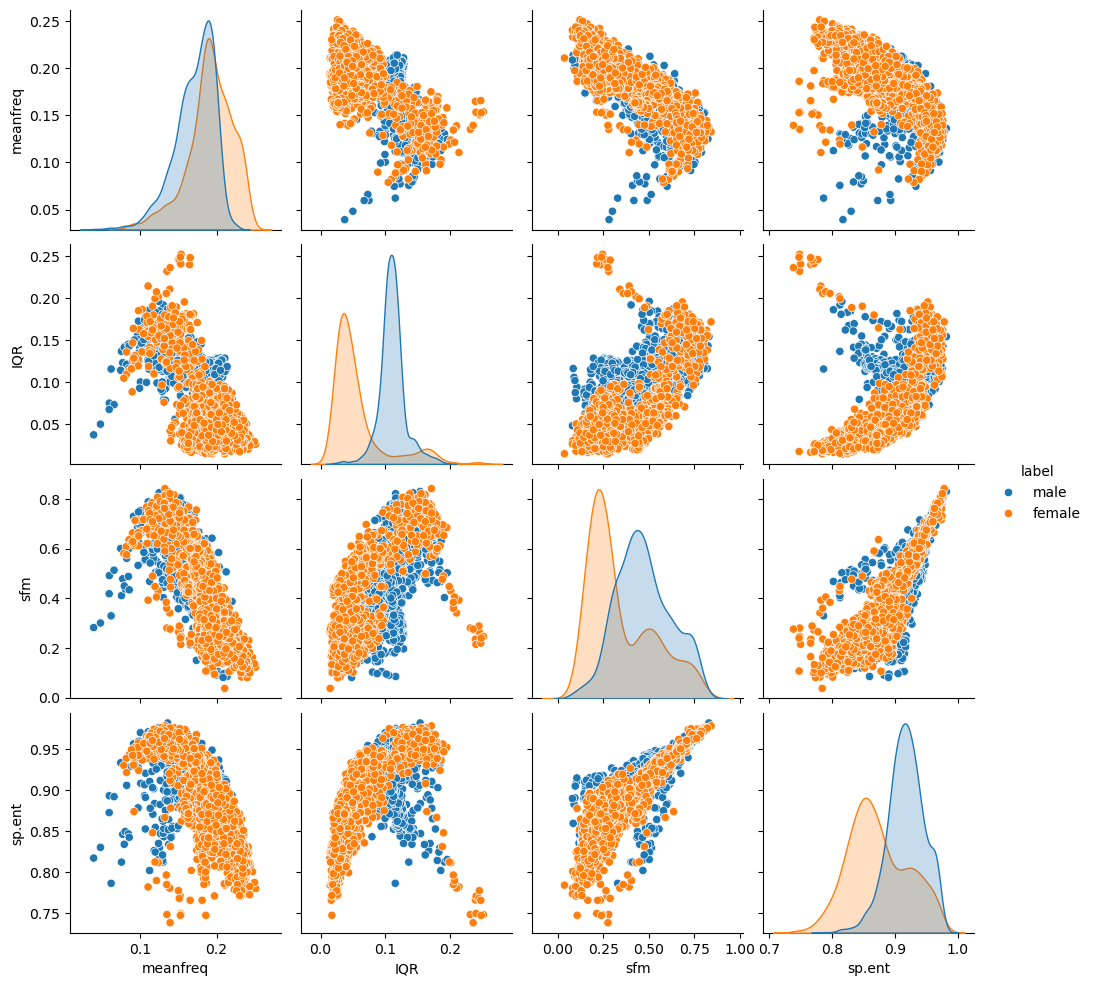

In [15]:
selected_features = ['meanfreq', 'IQR', 'sfm', 'sp.ent']

sns.pairplot(data, vars=selected_features, hue='label')
plt.show()

In [16]:
X = data[selected_features]
y = data['label']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K
knn = KNeighborsClassifier(n_neighbors=8)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9379600420609885
Confusion Matrix:
 [[426  26]
 [ 33 466]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      female       0.93      0.94      0.94       452
        male       0.95      0.93      0.94       499

    accuracy                           0.94       951
   macro avg       0.94      0.94      0.94       951
weighted avg       0.94      0.94      0.94       951



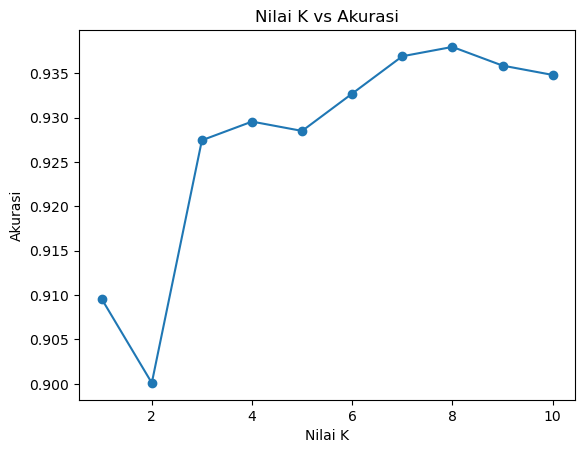

In [19]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()
